# PROBLEM STATEMENT


- You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decided to build a simple Artificial Neural Network to solve this problem.  

- Data set:
  - Input (X): Outside Air Temperature
  - Output (Y): Overall daily revenue generated in dollars 

- This example is a regression example, we will cover regression in more details in future projects. 


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg"
          width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Predict Ice Cream Sales [Source: https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg]
  </td></tr>
</table>


# STEP #0: IMPORT LIBRARIES

In [ ]:
from IPython.display import clear_output
# !pip install tensorflow-gpu
# !pip install psutil
# !pip install humanize
!pip install gputil
# !pip install matplotlib


clear_output()
print("Cheers !!! - Libraries Installed")

Cheers !!! - Libraries Installed


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#@title Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
#@title Code to get the GPU and RAM Details
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi

import tensorflow as tf
import psutil
import humanize
import GPUtil as GPU
import os

print("TensorFlow version: ",tf.__version__)

if tf.config.list_physical_devices('GPU'):
  print("\n|-- GPU Availalbe --|\n")
  # Print the GPU Details
  GPUs = GPU.getGPUs()
  gpu = GPUs[0]
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
  # Print details info about the GPU
  !nvidia-smi

else:
  print( "\n*** No GPU Found ***\n")



# #@title GPU Check

# if (tf.test.gpu_device_name().split(':')[1]) != 'GPU':
#   # print( "\n*** No GPU Found ***\n")  
#   raise TypeError("\n*** No GPU Found ***\n")    

# else: 
#   print("\n|-- GPU Availalbe --|\n")
#   print("GPU Available: ",tf.test.is_gpu_available())
#   print(tf.config.list_physical_devices('GPU'))
#   print("CPU/GPU : ",tf.config.list_physical_devices())




TensorFlow version:  2.12.0

|-- GPU Availalbe --|

Gen RAM Free: 11.9 GB  | Proc size: 656.2 MB
GPU RAM Free: 15098MB | Used: 3MB | Util   0% | Total 15360MB
Tue Apr 11 00:28:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+--------

# STEP #1: IMPORT DATASET

In [ ]:
#@title Data Importing 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Revenue_Prediction/SalesData.csv')

In [ ]:
df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# STEP #2: VISUALIZE DATASET

Text(0.5, 1.0, 'Revenue Generation Vs temprature')

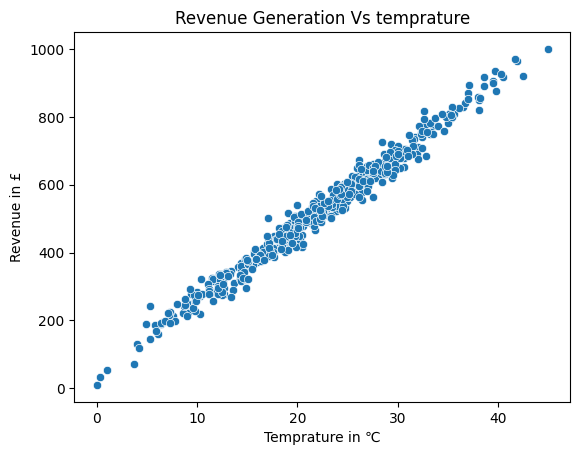

In [ ]:
sns.scatterplot(x = df['Temperature'] , y =  df['Revenue'])
plt.ylabel("Revenue in £")
plt.xlabel("Temprature in ℃")
plt.title("Revenue Generation Vs temprature")


# STEP #3: CREATE TESTING AND TRAINING DATASET

In [ ]:
# x_train =df['Temperature']
# y_train = df['Revenue']

# STEP#4: BUILD AND TRAIN THE MODEL

In [ ]:
# x_train.shape

(500,)

In [ ]:
# y_train.shape

(500,)

In [ ]:
#@title Creating a Model 

model = tf.keras.Sequential()

# 'Units' is number of neuron, and 'input shape' is, means one weight and one bias
model.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))
#adding one more output layer with sengle neuron
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [ ]:
# Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#@title Compiling  a model

# 0.5 is learning rate, mean_squared_error = true label or the ground troops minus the network predictions, 
# take that error square it and then apply in the mean of it across all the
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error') 

In [ ]:
#  To fit the training data to the model
epochs_hist = model.fit(df['Temperature'], df['Revenue'], epochs=1000)

Epoch 1/1000
16/16 [==============================] - 5s 5ms/step - loss: 159464.9219
Epoch 2/1000
16/16 [==============================] - 0s 5ms/step - loss: 14510.7090
Epoch 3/1000
16/16 [==============================] - 0s 4ms/step - loss: 4174.4766
Epoch 4/1000
16/16 [==============================] - 0s 4ms/step - loss: 1498.2750
Epoch 5/1000
16/16 [==============================] - 0s 4ms/step - loss: 804.6032
Epoch 6/1000
16/16 [==============================] - 0s 4ms/step - loss: 706.5533
Epoch 7/1000
16/16 [==============================] - 0s 4ms/step - loss: 688.9614
Epoch 8/1000
16/16 [==============================] - 0s 4ms/step - loss: 693.8328
Epoch 9/1000
16/16 [==============================] - 0s 4ms/step - loss: 672.5696
Epoch 10/1000
16/16 [==============================] - 0s 4ms/step - loss: 681.3282
Epoch 11/1000
16/16 [==============================] - 0s 4ms/step - loss: 700.8597
Epoch 12/1000
16/16 [==============================] - 0s 3ms/step - loss: 674

# STEP#5: EVALUATE THE MODEL 

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

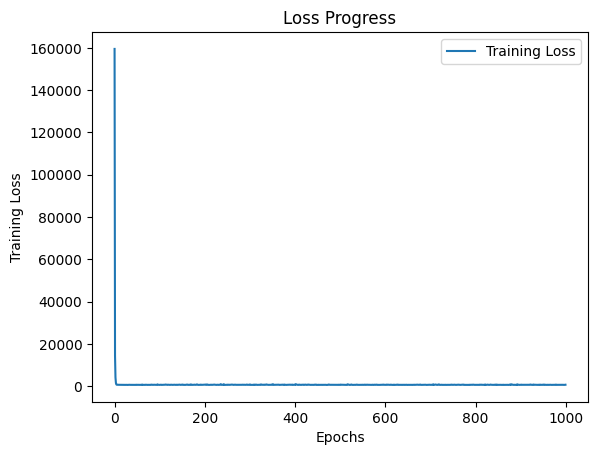

In [ ]:
#@title Training Loss visualizarion
plt.plot(epochs_hist.history['loss'])
plt.title('Loss Progress')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [ ]:
model.get_weights()



[array([[ 6.0446668e-01, -3.4100644e-02,  2.9130684e-02, -1.2394214e-02,
         -4.8439541e-01, -3.8971207e-01, -4.5312572e+00, -1.3696247e-02,
          1.5911604e-03, -5.6828354e-03]], dtype=float32),
 array([ 2.7540185e+00,  5.9314929e-03, -1.1419060e-02,  4.8607939e-01,
        -2.5759661e+00, -2.6355043e-01, -6.4985209e+00, -2.0529275e-01,
         1.5697443e-01,  2.1392095e-01], dtype=float32),
 array([[ 6.8644279e-01],
        [ 3.9555635e-02],
        [-8.5962452e-02],
        [-4.4794544e-03],
        [-5.6183803e-01],
        [ 2.5886095e-01],
        [-4.6165819e+00],
        [ 2.3972146e-02],
        [-8.9266319e-03],
        [-1.3514811e-03]], dtype=float32),
 array([11.543823], dtype=float32)]

In [ ]:
#@title Deploye of Trained Network and prediction


Temp_C = 40
sales_predection = model.predict([Temp_C])
print(f'Revenue Predictions Using Trained ANN : {sales_predection} ')

1/1 [==============================] - 0s 85ms/step
Revenue Predictions Using Trained ANN : [[904.8463]] 


16/16 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

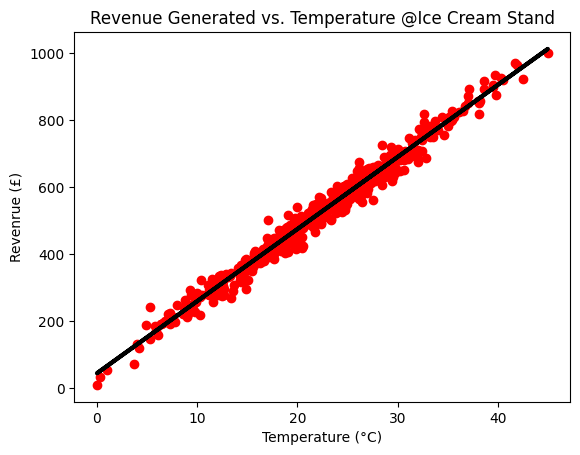

In [ ]:
plt.scatter(df["Temperature"],df["Revenue"], color = 'red')
plt.plot(df["Temperature"] , model.predict(df["Temperature"]) , color = 'black' , linewidth= 3 )
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenrue (£)')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')

In [110]:
# @title Save the model
model.save("/content/drive/MyDrive/Colab Notebooks/2. Revenue_Prediction/Revenue_prediction.h5")

# STEP #6 (OPTIONAL): CONFIRM USING REGRESSION KIT IN SCIKIT LEARN!

In [ ]:
x_train =df['Temperature']
y_train = df['Revenue']

In [ ]:
x_train.shape

(500,)

In [ ]:
y_train.shape

(500,)

In [ ]:
x_train = x_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)


In [ ]:
x_train.shape

(500, 1)

In [ ]:
y_train.shape

(500, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

# fit_intercept = True means, linear regression basically to return  (m) slope along with my y-coefficent
# fit_intercept = True means, Linear Model coeff(b) = 0.00, forcing the slope to pass through 0 at Y axis
regressor = LinearRegression(fit_intercept=True)
regressor.fit(x_train,y_train)


LinearRegression()

In [ ]:
print("Linear Model Coeff(m)" , regressor.coef_)
print("Linear Model coeff(b)", regressor.intercept_)

print("\n-- The output is similar to the model.get_weights() output")

Linear Model Coeff(m) [[21.44362551]]
Linear Model coeff(b) [44.83126709]

-- The output is similar to the model.get_weights() output


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

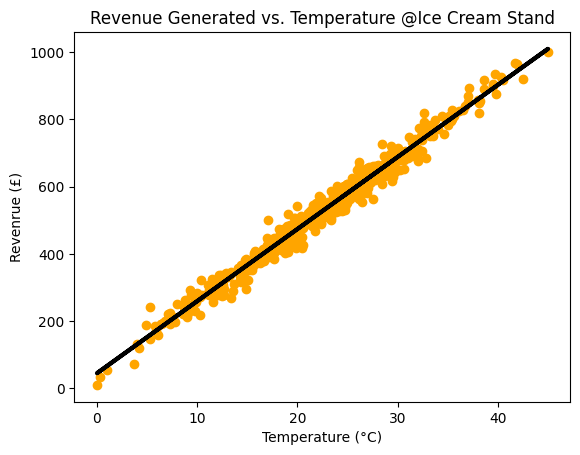

In [ ]:
plt.scatter(df["Temperature"],df["Revenue"], color = 'orange')
plt.plot(df["Temperature"] , regressor.predict(x_train) , color = 'black' , linewidth= 3 )
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenrue (£)')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')